In [1]:
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [74]:
### Select domain
domain_start = 0
domain_end = 1
domain = np.linspace(domain_start, domain_end, 500)

# Sparse Grid Interpolation Toolbox Functions

In [61]:
###################################################################
# Basis and Coefficient Routines
###################################################################
def build_hat(level, node, domain):
    mesh_delta = 1./(2**(level))
    hat_function = np.zeros(len(domain))
    hat_function = 1. - np.abs(domain/mesh_delta - node)
    hat_function = np.clip(hat_function,0,None)  
    return hat_function

def find_coeff_1D(level, node, func):
    mesh_delta = 1/(2**(level))
    point1 = func(node*mesh_delta)
    point2 = func((node-1)*mesh_delta)
    point3 = func((node+1)*mesh_delta)
    
    return point1 - (point2 + point3)/2.0

In [125]:
###################################################################
# Dense grid interpolation
###################################################################
def dense_interpolation_1D(max_level, domain, func, plot_basis_funcs=False):  
    level = np.arange(1,max_level+1,1)
    func_approx = np.zeros(len(domain))
    error = []
    
    for l in level:
        start_node = 1
        nodes = np.arange(start_node, 2**(l), 2)
        for node in nodes:
            hat_hold = build_hat(l,node,domain)
            coe_hold = find_coeff_1D(l,node,func)
            
            # To visualize hat functions
            if(plot_basis_funcs):
                plt.plot(domain, coe_hold*hat_hold,label=r"$\alpha_{%d,%d}$"%(l,node)) 
                
            func_approx = func_approx + coe_hold*hat_hold
        error.append(func_approx-func(domain))
            
    return func_approx,error

# Test Cases

In [152]:
###################################################################
### Sample test functions for interpolation in 1- and 2-D
###################################################################

### currently must vanish at end points

# 1-dimensional
def sine( x_val ):
    return np.sin(np.pi*x_val)

def cosine( x_val ):
    return 0.5-0.5*np.cos(2*np.pi*x_val)

def gaussian( x_val ):
    return np.exp(-(x_val-0.5)**2/0.05)

def quadratic( x_val ):
    return -4.*(x_val-0.5)**2+1.0
    #return -(x_val-0.5)**2+0.25

def cubic( x_val ):
    return x_val*(x_val-0.5)*(x_val-1.0)

def quartic( x_val ):
    return -20*x_val*(x_val-0.3)*(x_val-0.6)*(x_val-1.)

# 2-dimensional
def quadratic_2D(x_val, y_val):
    return -((x_val + y_val-0.5)**2)+0.5**2

In [153]:
def plot_dense_comparison(domain,func,nlevs):
    fig, ax = plt.subplots(1,3,figsize=(22,6))
    plt.sca(ax[0])

    yinterp,error = dense_interpolation_1D(nlevs,domain,func,plot_basis_funcs=True)
    plt.title('Scaled Hierarchical Basis Functions %d Levels'%nlevs)

    ax[1].plot(domain,yinterp,label='Interpolation')
    ax[1].plot(domain,func(domain),label='Original Function')
    ax[1].set_title('Interpolation vs Function')
    ax[1].legend()
    
    for i in range(len(error)):
        ax[2].plot(domain,np.abs(error[i]))
    ax[2].set_title('Absolute Error by Level')

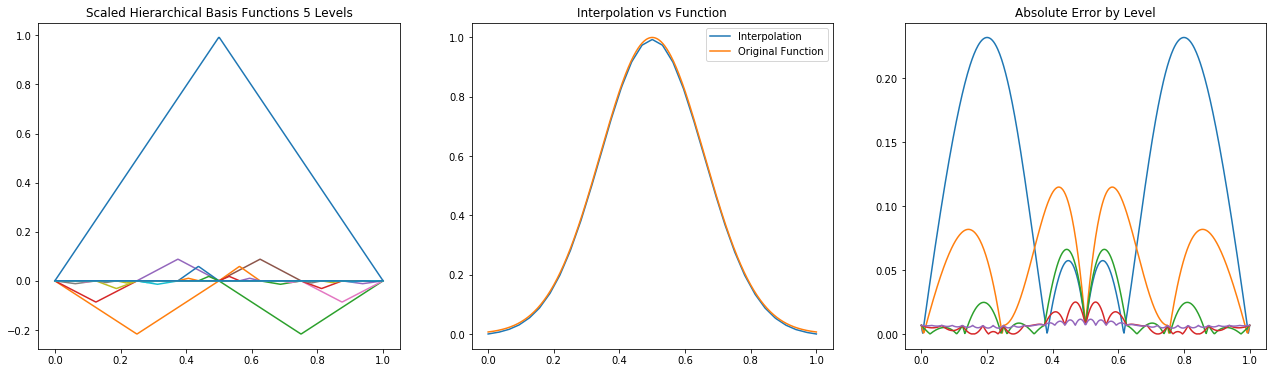

In [154]:
#plot_dense_comparison(domain,quadratic,5)
#plot_dense_comparison(domain,cubic,5)
#plot_dense_comparison(domain,quartic,5)
#plot_dense_comparison(domain,sine,5)
#plot_dense_comparison(domain,cosine,5)
plot_dense_comparison(domain,gaussian,5)

[0 1 2 3 4 5]


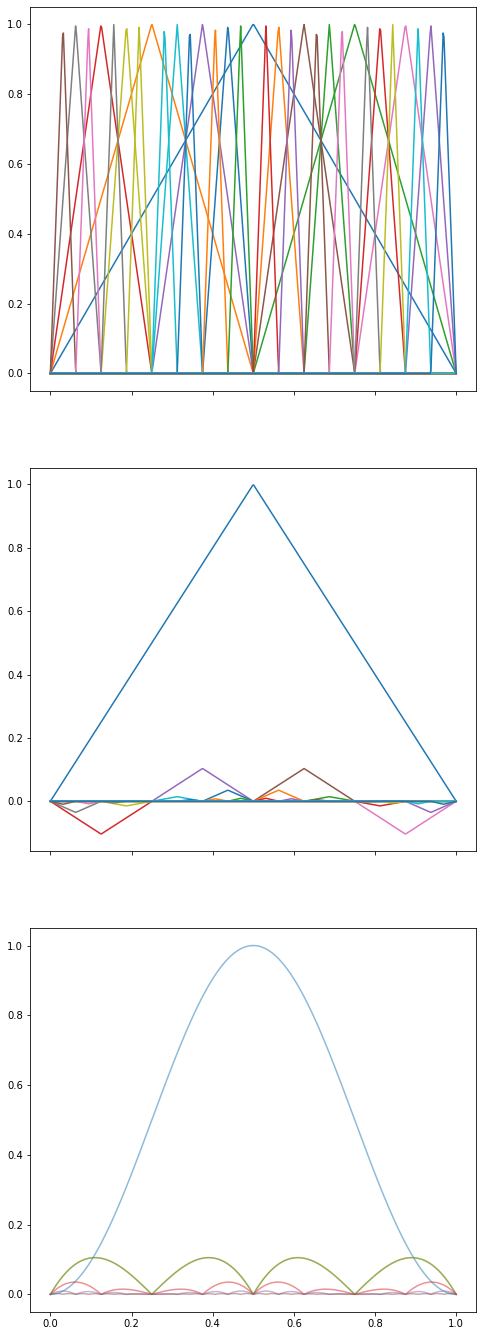

In [106]:
level = np.arange(0,6,1)
print (level)

fig, ax = plt.subplots(3,1,figsize=(8,24),sharex=True)
func_approx = np.zeros(len(domain))

for l in level:
    nodes = np.arange(1, 2**(l), 2)
    for node in nodes:
        hat_hold = build_hat(l,node,domain)
        ax[0].plot(domain, hat_hold,label=r"$\alpha_{%d,%d}$"%(l,node)) 
        coe_hold = find_coeff_1D(l,node,cosine)
        ax[1].plot(domain, coe_hold*hat_hold,label=r"$\alpha_{%d,%d}$"%(l,node)) 
        
        func_approx = func_approx + coe_hold*hat_hold
#ax[2].plot(domain,func_approx)
#ax[2].plot(domain,cosine(domain),color='k',alpha=0.5)
    ax[2].plot(domain,np.abs(func_approx-cosine(domain)),alpha=0.5)

#         # To visualize hat functions
#         if(plot_basis_funcs):
#             plt.plot(domain, coe_hold*hat_hold,label=r"$\alpha_{%d,%d}$"%(l,node)) 

#         func_approx = func_approx + coe_hold*hat_hold

# return func_approx

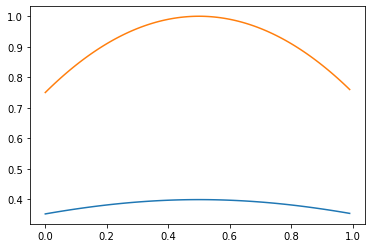

In [36]:
plt.plot(domain,gaussian(domain))
plt.plot(domain,quadratic(domain))